In [1]:
# Project 16: IELTS Official Score Predictor 
# Predict the official IELTS score based on mock test scores and practice time 
# Using Linear Regression and Data Analytics to find hidden patterns.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# STEP 1: API SIMULATION (Fetching Data) 
def fetch_student_performance_api():
    print("Connecting to Assessment Platform API...")
    # Simulating data for 200 students
    # Logic: Students with higher mock scores & more study hours tend to get higher official scores
    np.random.seed(42)
    data = []
    
    for _ in range(200):
        # Generate random mock scores (Band 0-9)
        mock_reading = np.random.uniform(4.5, 8.5)
        mock_listening = np.random.uniform(4.5, 8.5)
        mock_writing = np.random.uniform(4.0, 7.5) # Writing is usually harder
        mock_speaking = np.random.uniform(4.0, 7.5)
        
        study_hours = np.random.randint(20, 200) # Total hours studied
        
        # Simulate Official Score with some noise (Real life is unpredictable!)
        # Official score is roughly average of mocks + bonus from studying
        avg_mock = (mock_reading + mock_listening + mock_writing + mock_speaking) / 4
        official_score = avg_mock + (study_hours * 0.002) + np.random.normal(0, 0.2)
        
        # Round to nearest 0.5 (IELTS scoring rule)
        official_score = round(official_score * 2) / 2
        # Cap score at 9.0
        official_score = min(official_score, 9.0)
        
        data.append({
            'mock_reading': round(mock_reading, 1),
            'mock_listening': round(mock_listening, 1),
            'mock_writing': round(mock_writing, 1),
            'mock_speaking': round(mock_speaking, 1),
            'study_hours': study_hours,
            'official_score': official_score # The TARGET
        })
    
    return data

# Load data into DataFrame
raw_data = fetch_student_performance_api()
df = pd.DataFrame(raw_data)

print(f"Data Fetched Successfully. Records: {len(df)}")



Connecting to Assessment Platform API...
Data Fetched Successfully. Records: 200


In [2]:
# STEP 2: DATA TRANSFORMATION 

# Feature 1: Average Mock Band
# The overall band is the average of 4 skills. This is a very strong predictor.
df['avg_mock_band'] = (df['mock_reading'] + df['mock_listening'] + 
                       df['mock_writing'] + df['mock_speaking']) / 4



 Starting Data Analytics 



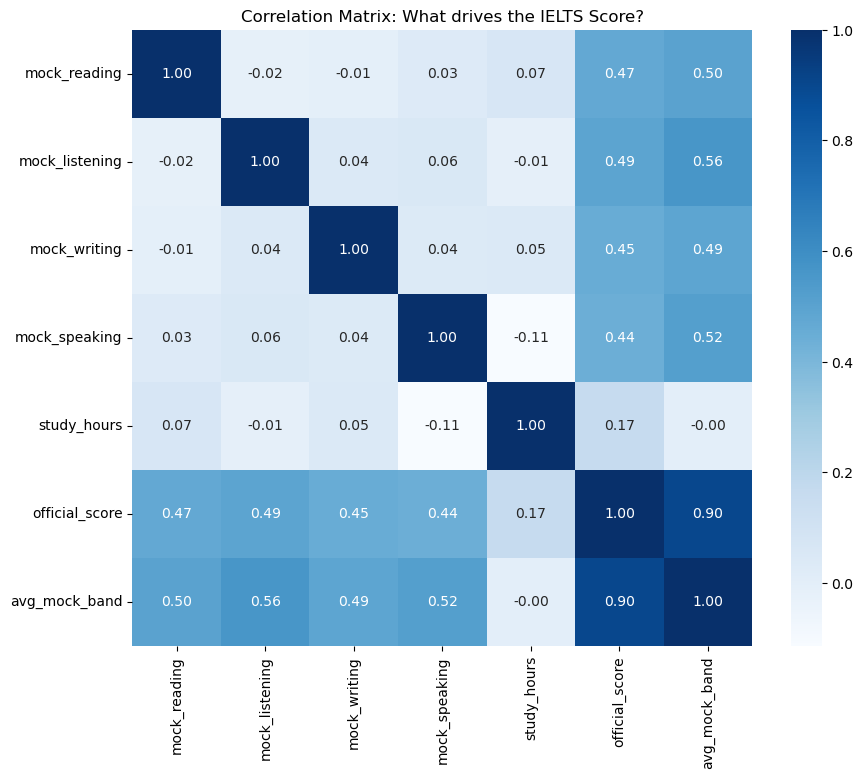

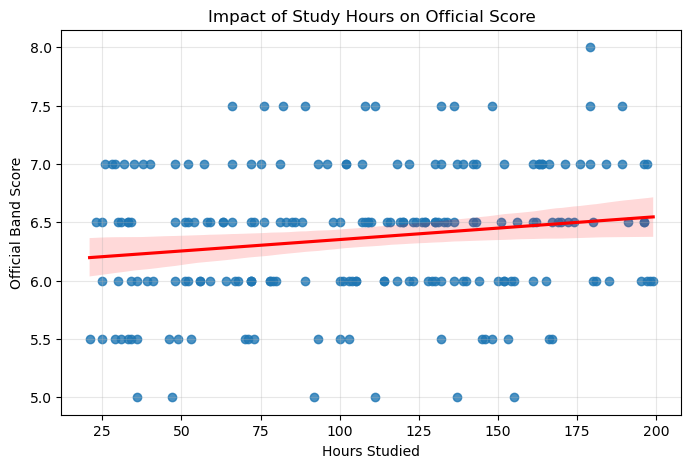

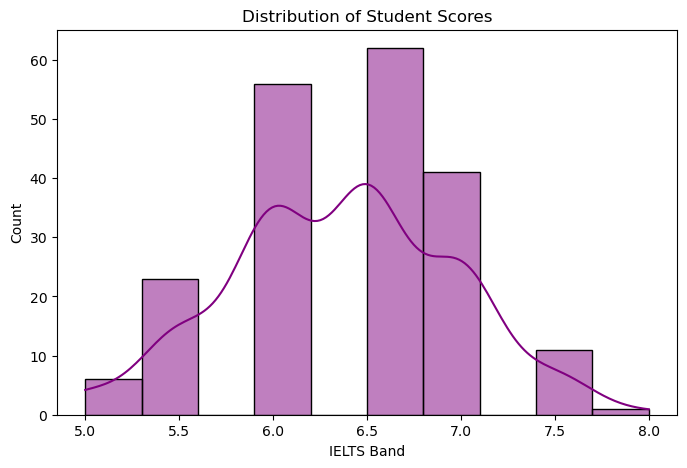

In [3]:
# STEP 3: DATA ANALYTICS (EDA) 
print("\n Starting Data Analytics \n")

# A. Correlation Heatmap
# Goal: Identify which factors correlate most with the Official Score.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix: What drives the IELTS Score?")
plt.show()

# B. Scatter Plot with Regression Line
# Goal: Visualize the impact of Study Hours on the Score.
# Does studying more actually help? (Linear Relationship)
plt.figure(figsize=(8, 5))
sns.regplot(x='study_hours', y='official_score', data=df, line_kws={"color": "red"})
plt.title("Impact of Study Hours on Official Score")
plt.xlabel("Hours Studied")
plt.ylabel("Official Band Score")
plt.grid(True, alpha=0.3)
plt.show()

# C. Distribution of Scores
# Goal: See the spread of student performance.
plt.figure(figsize=(8, 5))
sns.histplot(df['official_score'], bins=10, kde=True, color='purple')
plt.title("Distribution of Student Scores")
plt.xlabel("IELTS Band")
plt.show()


In [15]:
# STEP 4: MACHINE LEARNING (REGRESSION) 

# Inputs (Features)
X = df[['avg_mock_band', 'study_hours', 'mock_writing']] 
# Note: I included 'mock_writing' separately because it's often the skill that drags the score down.

# Output (Target)
y = df['official_score']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
# Linear Regression fits a straight line through the data points
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [17]:
# STEP 5: EVALUATION 
predictions = model.predict(X_test)

# MAE: Mean Absolute Error (On average, how far off is our prediction?)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\n Model Evaluation ")
print(f"R2 Score (Accuracy): {r2:.2f}") # Closer to 1.0 is better
print(f"Mean Absolute Error: {mae:.2f}") 



 Model Evaluation 
R2 Score (Accuracy): 0.86
Mean Absolute Error: 0.16


In [19]:
# STEP 6: REAL-TIME PREDICTION APP 
def predict_ielts_score(reading, listening, writing, speaking, hours):
    # 1. Process Input
    avg_mock = (reading + listening + writing + speaking) / 4
    
    # 2. Create Feature Array (Must match Training order)
    # Features: ['avg_mock_band', 'study_hours', 'mock_writing']
    features = np.array([[avg_mock, hours, writing]])
    
    # 3. Predict
    pred_score = model.predict(features)[0]
    
    # Round to nearest 0.5 (IELTS Format)
    final_band = round(pred_score * 2) / 2
    return min(final_band, 9.0)

# Simulate a new student
new_student = {
    'reading': 6.5,
    'listening': 7.0,
    'writing': 6.0,  # Weak writing
    'speaking': 6.5,
    'hours': 50      # Studied 50 hours
}

predicted_band = predict_ielts_score(
    new_student['reading'], 
    new_student['listening'], 
    new_student['writing'], 
    new_student['speaking'], 
    new_student['hours']
)

print(f"\n Prediction for New Student ")
print(f"Input: {new_student}")
print(f"PREDICTED OFFICIAL SCORE: {predicted_band}")

if predicted_band >= 6.5:
    print("Recommendation: Ready to take the exam!")
else:
    print("Recommendation: Need more practice (Target: 6.5)")



 Prediction for New Student 
Input: {'reading': 6.5, 'listening': 7.0, 'writing': 6.0, 'speaking': 6.5, 'hours': 50}
PREDICTED OFFICIAL SCORE: 6.5
Recommendation: Ready to take the exam!


C:\Users\haing\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
